In [3]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.0.0


In [4]:
#dataset
X_train = [[73.,80.,75.],[93.,88.,93.],[89.,91.,90.],[96.,98.,100.],[73.,66.,70.]]
y_train = [[152],[185],[180],[196],[142]]

In [5]:
#make class
class multi_linear(object):    
    #initialization
    def __init__(self, learning_rate=1e-5):
        self.W = tf.Variable(tf.random.normal([3,1]),name='weight')
        self.b = tf.Variable(tf.random.normal([1]),name='bias')
        # make optimizer that use Gradient descent
        self.optimizer = tf.keras.optimizers.SGD(lr=learning_rate)
    
    #compute cost and find best parameter   
    def fit(self, X, y, epochs=20):
        #epoch : count of learning in machine learning
        cost = []
        for i in range(epochs):
            #make calculation method of cost and save result
            #GradientTape : Record operation for automatic differentiation
            with tf.GradientTape() as tape:
                #matmul : support matrix multiplication
                predict_y = tf.matmul(X,self.W)+self.b
                sqr_errors = tf.square(y - predict_y)
                mean_cost = tf.reduce_mean(sqr_errors)
            #compute gradient
            grads = tape.gradient(mean_cost, [self.W, self.b])
            # find least cost using optimizer
            self.optimizer.apply_gradients(zip(grads, [self.W, self.b]))
            cost.append(mean_cost)
        return cost
    
    #return predicted value
    def predict(self, X):
        return tf.matmul(X,self.W)+self.b

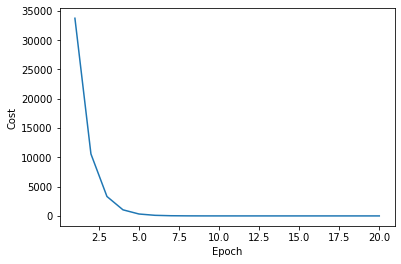

target value :  [152]  predicted value :  tf.Tensor([149.16399], shape=(1,), dtype=float32)
target value :  [185]  predicted value :  tf.Tensor([186.46892], shape=(1,), dtype=float32)
target value :  [180]  predicted value :  tf.Tensor([180.01334], shape=(1,), dtype=float32)
target value :  [196]  predicted value :  tf.Tensor([193.65388], shape=(1,), dtype=float32)
target value :  [142]  predicted value :  tf.Tensor([146.44054], shape=(1,), dtype=float32)


In [6]:
#make model
model = multi_linear()
costs = model.fit(X_train, y_train)

#make graph
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,len(costs) + 1), costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()
value_predict=model.predict(X_train)

#compare real value and predicted value
for i in range(5):
    print("target value : ",y_train[i], " predicted value : ",value_predict[i])